In [1]:
df = spark.read.csv('/FileStore/tables/crime.csv', header=True)
# df.show()

In [2]:
df.describe().show()

+-------+---------------+------------------+------------------+--------------------+--------+------------------+--------+-------------------+------------------+----------------+-----------+------------------+--------+-----------+-----------------+------------------+--------------------+
summary|INCIDENT_NUMBER| OFFENSE_CODE|OFFENSE_CODE_GROUP| OFFENSE_DESCRIPTION|DISTRICT| REPORTING_AREA|SHOOTING| OCCURRED_ON_DATE| YEAR| MONTH|DAY_OF_WEEK| HOUR|UCR_PART| STREET| Lat| Long| Location|
+-------+---------------+------------------+------------------+--------------------+--------+------------------+--------+-------------------+------------------+----------------+-----------+------------------+--------+-----------+-----------------+------------------+--------------------+
 count| 327820| 327820| 327820| 327820| 326046| 327820| 1055| 327820| 327820| 327820| 327820| 327820| 327727| 316843| 307188| 307188| 327820|
 mean| 1.4205255E8| 2317.961170764444| null| null| null| 383.238266536331| null| null|2016.5986761027393|6.67221340979806| null|13.114840461228724| null| 54.0|42.21299505769278|-70.90603030526992| null|
 stddev| NaN|1184.9900730331738| null| null| null|242.00732385223102| null| null|1.0097747593310036|3.25398404705967| null| 6.292714255219985| null| 0.0|2.173496143378729|3.5158319479716202| null|
 min| 142052550| 00111|Aggravated Assault|A&B HANDS, FEET, ...| A1| | Y|2015-06-15 00:00:00| 2015| 1| Friday| 0| Other| ALBANY ST | -1.00000000| -1.00000000|(-1.00000000, -1....|
 max| I182080058| 3201| Warrant Arrests|WEAPON - OTHER - ...| E5| 99| Y|2018-10-03 20:49:00| 2018| 9| Wednesday| 9|Part Two| ZELLER ST| 42.39504158| -71.17867378|(42.39504158, -71...|
+-------+---------------+------------------+------------------+--------------------+--------+------------------+--------+-------------------+------------------+----------------+-----------+------------------+--------+-----------+-----------------+------------------+--------------------+

In [3]:
import pyspark.sql.functions as fn
df.groupBy('OFFENSE_CODE_GROUP').agg(fn.count('OFFENSE_CODE_GROUP')).orderBy('count(OFFENSE_CODE_GROUP)', ascending=False).show(truncate=False)

+-------------------------------+-------------------------+
OFFENSE_CODE_GROUP |count(OFFENSE_CODE_GROUP)|
+-------------------------------+-------------------------+
Motor Vehicle Accident Response|38134 |
Larceny |26670 |
Medical Assistance |24226 |
Investigate Person |19176 |
Other |18612 |
Drug Violation |17037 |
Simple Assault |16263 |
Vandalism |15810 |
Verbal Disputes |13478 |
Towed |11632 |
Investigate Property |11443 |
Larceny From Motor Vehicle |11120 |
Property Lost |10077 |
Warrant Arrests |8579 |
Aggravated Assault |8033 |
Violations |6226 |
Fraud |6033 |
Residential Burglary |5723 |
Missing Person Located |5133 |
Auto Theft |4954 |
+-------------------------------+-------------------------+
only showing top 20 rows

In [4]:
# check how many NULL we have as percentage
df.select(*[(fn.count(c) / fn.count("*")).alias(c) for c in df.columns]).show()

+---------------+------------+------------------+-------------------+------------------+--------------+--------------------+----------------+----+-----+-----------+----+------------------+-----------------+------------------+------------------+--------+
INCIDENT_NUMBER|OFFENSE_CODE|OFFENSE_CODE_GROUP|OFFENSE_DESCRIPTION| DISTRICT|REPORTING_AREA| SHOOTING|OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR| UCR_PART| STREET| Lat| Long|Location|
+---------------+------------+------------------+-------------------+------------------+--------------+--------------------+----------------+----+-----+-----------+----+------------------+-----------------+------------------+------------------+--------+
 1.0| 1.0| 1.0| 1.0|0.9945884936855591| 1.0|0.003218229516197...| 1.0| 1.0| 1.0| 1.0| 1.0|0.9997163077298518|0.966515160758953|0.9370630223903361|0.9370630223903361| 1.0|
+---------------+------------+------------------+-------------------+------------------+--------------+--------------------+----------------+----+-----+-----------+----+------------------+-----------------+------------------+------------------+--------+

In [5]:
# remove '-1' from Lat and Lon and replace it with NULL
import pyspark.sql.functions as fn
df = df.withColumn('Lat_clean', fn.when(df['Lat'] == -1, None).otherwise(df['Lat']))
df = df.withColumn('Long_clean', fn.when(df['Long'] == -1, None).otherwise(df['Long']))
df.show(50)

+---------------+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+----------+----------------+-----------+------------+--------------------+-----------+------------+
INCIDENT_NUMBER|OFFENSE_CODE| OFFENSE_CODE_GROUP| OFFENSE_DESCRIPTION|DISTRICT|REPORTING_AREA|SHOOTING| OCCURRED_ON_DATE|YEAR|MONTH|DAY_OF_WEEK|HOUR| UCR_PART| STREET| Lat| Long| Location| Lat_clean| Long_clean|
+---------------+------------+--------------------+--------------------+--------+--------------+--------+-------------------+----+-----+-----------+----+----------+----------------+-----------+------------+--------------------+-----------+------------+
 I182080058| 02403| Disorderly Conduct|DISTURBING THE PEACE| E18| 495| null|2018-10-03 20:13:00|2018| 10| Wednesday| 20| Part Two| ARLINGTON ST|42.26260773|-71.12118637|(42.26260773, -71...|42.26260773|-71.12118637|
 I182080053| 03201| Property Lost| PROPERTY - LOST| D14| 795| null|2018-08-30 20:00:00|2018| 8| Thursday| 20|Part Three| ALLSTON ST|42.35211146|-71.13531147|(42.35211146, -71...|42.35211146|-71.13531147|
 I182080052| 02647| Other|THREATS TO DO BOD...| B2| 329| null|2018-10-03 19:20:00|2018| 10| Wednesday| 19| Part Two| DEVON ST|42.30812619|-71.07692974|(42.30812619, -71...|42.30812619|-71.07692974|
 I182080051| 00413| Aggravated Assault|ASSAULT - AGGRAVA...| A1| 92| null|2018-10-03 20:00:00|2018| 10| Wednesday| 20| Part One| CAMBRIDGE ST|42.35945371|-71.05964817|(42.35945371, -71...|42.35945371|-71.05964817|
 I182080050| 03122| Aircraft| AIRCRAFT INCIDENTS| A7| 36| null|2018-10-03 20:49:00|2018| 10| Wednesday| 20|Part Three| PRESCOTT ST|42.37525782|-71.02466343|(42.37525782, -71...|42.37525782|-71.02466343|
 I182080049| 01402| Vandalism| VANDALISM| C11| 351| null|2018-10-02 20:40:00|2018| 10| Tuesday| 20| Part Two| DORCHESTER AVE|42.29919694|-71.06046974|(42.29919694, -71...|42.29919694|-71.06046974|
 I182080048| 03803|Motor Vehicle Acc...|M/V ACCIDENT - PE...| null| | null|2018-10-03 20:16:00|2018| 10| Wednesday| 20|Part Three| null|42.32073413|-71.05676415|(42.32073413, -71...|42.32073413|-71.05676415|
 I182080047| 03301| Verbal Disputes| VERBAL DISPUTE| B2| 603| null|2018-10-03 19:32:00|2018| 10| Wednesday| 19|Part Three| TREMONT ST|42.33380683|-71.10377843|(42.33380683, -71...|42.33380683|-71.10377843|
 I182080045| 00802| Simple Assault|ASSAULT SIMPLE - ...| E18| 543| null|2018-10-03 19:27:51|2018| 10| Wednesday| 19| Part Two| AVILA RD|42.25614494|-71.12802506|(42.25614494, -71...|42.25614494|-71.12802506|
 I182080044| 03410| Towed| TOWED MOTOR VEHICLE| D4| 621| null|2018-10-03 20:00:00|2018| 10| Wednesday| 20|Part Three|COMMONWEALTH AVE|42.34886600|-71.08936284|(42.34886600, -71...|42.34886600|-71.08936284|
 I182080043| 03803|Motor Vehicle Acc...|M/V ACCIDENT - PE...| D14| 750| null|2018-10-03 19:33:00|2018| 10| Wednesday| 19|Part Three| FOSTER ST|42.34432328|-71.15778368|(42.34432328, -71...|42.34432328|-71.15778368|
 I182080042| 00706| Auto Theft|AUTO THEFT - MOTO...| E13| 582| null|2018-10-01 20:00:00|2018| 10| Monday| 20| Part One| BYNNER ST|42.32324363|-71.10892316|(42.32324363, -71...|42.32324363|-71.10892316|
 I182080041| 03006| Medical Assistance|SICK/INJURED/MEDI...| E18| 484| null|2018-10-03 17:18:00|2018| 10| Wednesday| 17|Part Three| BELNEL RD|42.26059891|-71.10306140|(42.26059891, -71...|42.26059891|-71.10306140|
 I182080040| 03115| Investigate Person| INVESTIGATE PERSON| B3| 427| null|2018-10-03 08:00:00|2018| 10| Wednesday| 8|Part Three| ELIZABETH ST|42.27986526|-71.08798275|(42.27986526, -71...|42.27986526|-71.08798275|
 I182080039| 03006| Medical Assistance|SICK/INJURED/MEDI...| B3| 469| null|2018-10-03 19:58:30|2018| 10| Wednesday| 19|Part Three| FOTTLER RD|42.27791927|-71.09640610|(42.27791927, -71...|42.27791927|-71.09640610|
 I182080038| 03831|Motor Vehicle Acc...|M/V - LEAVING SCE...| null| | null|2018-10-03 19:30:00|2018| 10| Wednesday| 19|Part Three| null|42.31596119|-71.09042564|(4

In [6]:
%fs rm -r '/FileStore/tables/plot_data_shooting.parquet'

res2: Boolean = true

In [7]:
%fs rm -r '/FileStore/tables/plot_data_all.parquet'

res3: Boolean = true

In [8]:
# export for later use of the data locally
df.select(['Lat_clean', 'Long_clean', 'OFFENSE_CODE', 'Year']).repartition(1).write.parquet('/FileStore/tables/plot_data_all.parquet')
df.where(fn.col('SHOOTING').isNotNull()).select(['Lat_clean', 'Long_clean', 'Year', 'SHOOTING']).repartition(1).write.parquet('/FileStore/tables/plot_data_shooting.parquet')

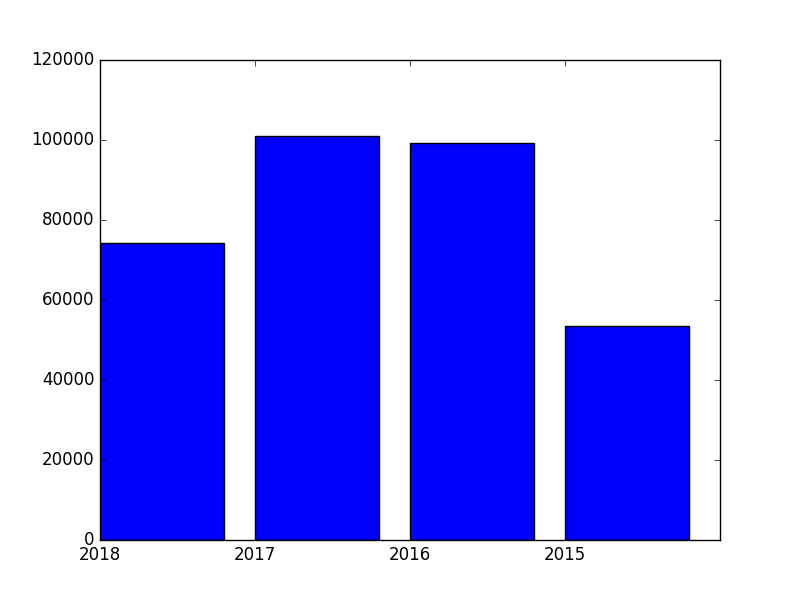

In [9]:
# plot total number of crimes per year
counts = df.groupBy('YEAR').agg(fn.count('YEAR')).withColumnRenamed('count(YEAR)', 'count').orderBy('YEAR', ascending=False).toPandas()

import numpy as np
import matplotlib.pyplot as plt

YEAR = counts['YEAR']
count = counts['count']
x = np.arange(len(YEAR))

fig, ax = plt.subplots()
ax.bar(x, count)
plt.xticks(x, YEAR)

display(fig)

In [10]:
# plot total number of crimes per year
counts = df.groupBy(['YEAR','MONTH']).agg(fn.count('YEAR')).withColumnRenamed('count(YEAR)', 'count').orderBy(['YEAR','MONTH'], ascending=False)

counts = counts.withColumn('MONTH', counts['MONTH'].cast('int'))
counts = counts.withColumn('YEAR', counts['YEAR'].cast('int'))


counts2018 = counts.where(fn.col('YEAR') == 2018).select(['MONTH','count']).toPandas()
counts2017 = counts.where(fn.col('YEAR') == 2017).select(['MONTH','count']).toPandas()
counts2016 = counts.where(fn.col('YEAR') == 2016).select(['MONTH','count']).toPandas()
counts2015 = counts.where(fn.col('YEAR') == 2015).select(['MONTH','count']).toPandas()


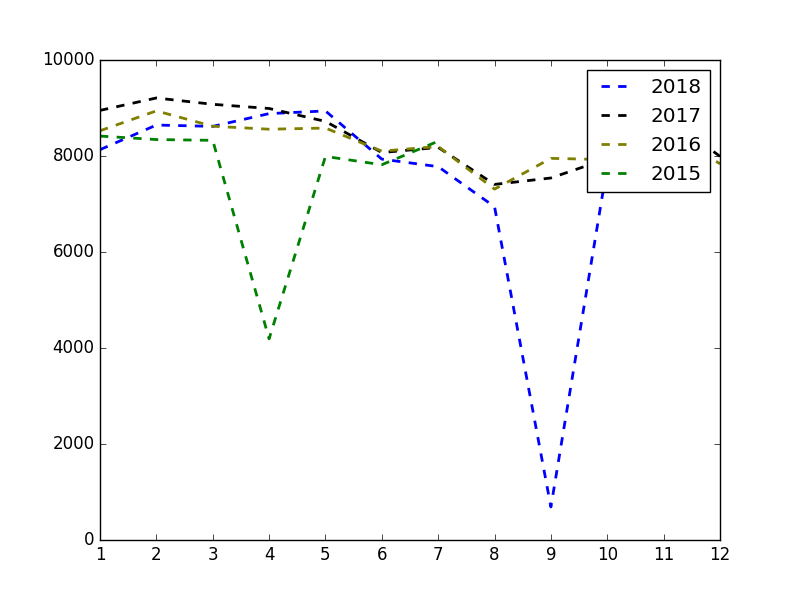

In [11]:
MONTH = counts2017.sort_values('MONTH')['MONTH']
x = np.arange(len(MONTH))

fig, ax = plt.subplots()

count18 = counts2018['count']
MONTH = counts2018.sort_values('MONTH')['MONTH']
x = np.arange(len(MONTH))
ax.plot(x, count18, marker='', color='blue', linewidth=2, linestyle='dashed', label="2018")

count17 = counts2017['count']
MONTH = counts2017.sort_values('MONTH')['MONTH']
x = np.arange(len(MONTH))
plt.xticks(x, MONTH)
ax.plot(x, count17, marker='', color='black', linewidth=2, linestyle='dashed', label='2017')

count16 = counts2016['count']
ax.plot(x, count16, marker='', color='olive', linewidth=2, linestyle='dashed', label='2016')

count15 = counts2015['count']
MONTH = counts2015.sort_values('MONTH')['MONTH']
x = np.arange(len(MONTH))
ax.plot(x, count15, marker='', color='green', linewidth=2, linestyle='dashed', label='2015')


ax.legend()

display(fig)

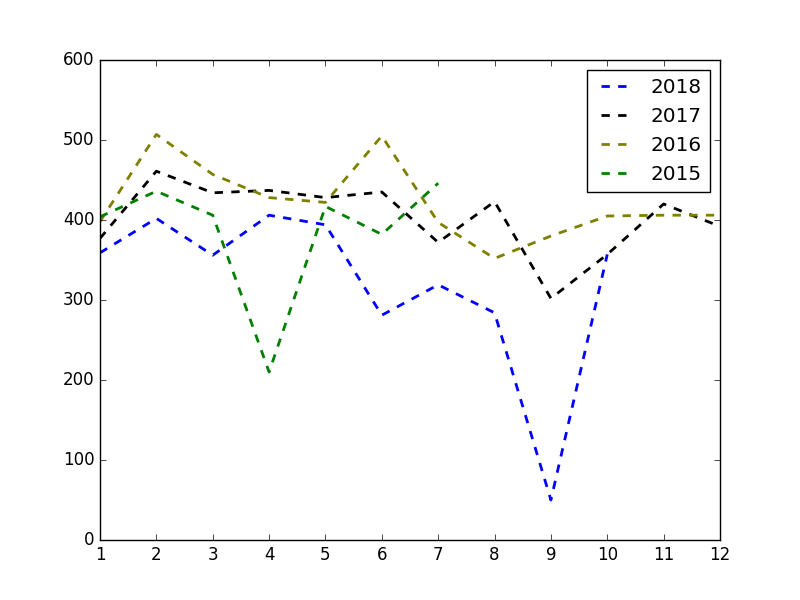

In [13]:
# plot crimes per month - change crime by code_group variable
counts = df.groupBy(['OFFENSE_CODE_GROUP', 'YEAR','MONTH']).agg(fn.count('YEAR')).withColumnRenamed('count(YEAR)', 'count').orderBy(['YEAR','MONTH'], ascending=False)


from pyspark.sql.types import IntegerType

counts = counts.withColumn('MONTH', counts['MONTH'].cast(IntegerType()))
counts = counts.withColumn('YEAR', counts['YEAR'].cast(IntegerType()))





#counts.show(3)

CODE_GROUP = 'Vandalism'
counts2018 = counts.where(fn.col('YEAR') == 2018).where(fn.col('OFFENSE_CODE_GROUP') == CODE_GROUP).select(['OFFENSE_CODE_GROUP', 'MONTH','count']).toPandas()
counts2017 = counts.where(fn.col('YEAR') == 2017).where(fn.col('OFFENSE_CODE_GROUP') == CODE_GROUP).select(['MONTH','count']).toPandas()
counts2016 = counts.where(fn.col('YEAR') == 2016).where(fn.col('OFFENSE_CODE_GROUP') == CODE_GROUP).select(['MONTH','count']).toPandas()
counts2015 = counts.where(fn.col('YEAR') == 2015).where(fn.col('OFFENSE_CODE_GROUP') == CODE_GROUP).select(['MONTH','count']).toPandas()



MONTH = counts2017.sort_values('MONTH')['MONTH']
x = np.arange(len(MONTH))

fig, ax = plt.subplots()

count18 = counts2018['count']
MONTH = counts2018.sort_values('MONTH')['MONTH']
x = np.arange(len(MONTH))
ax.plot(x, count18, marker='', color='blue', linewidth=2, linestyle='dashed', label="2018")

count17 = counts2017['count']
MONTH = counts2017.sort_values('MONTH')['MONTH']
x = np.arange(len(MONTH))
plt.xticks(x, MONTH)
ax.plot(x, count17, marker='', color='black', linewidth=2, linestyle='dashed', label='2017')

count16 = counts2016['count']
ax.plot(x, count16, marker='', color='olive', linewidth=2, linestyle='dashed', label='2016')

count15 = counts2015['count']
MONTH = counts2015.sort_values('MONTH')['MONTH']
x = np.arange(len(MONTH))
ax.plot(x, count15, marker='', color='green', linewidth=2, linestyle='dashed', label='2015')


ax.legend()

display(fig)

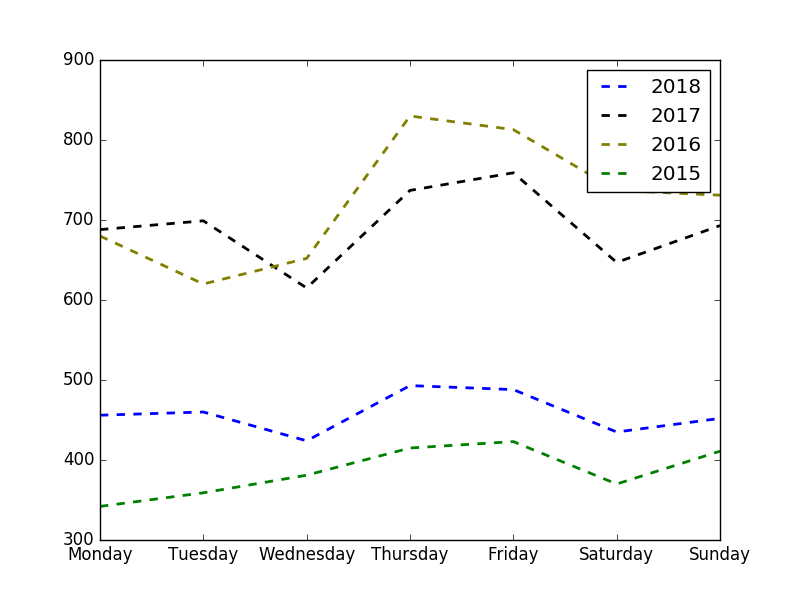

In [14]:
# plot weekly trends of crimes
counts = df.groupBy(['OFFENSE_CODE_GROUP', 'YEAR','DAY_OF_WEEK']).agg(fn.count('YEAR')).withColumnRenamed('count(YEAR)', 'count').orderBy(['YEAR','DAY_OF_WEEK'], ascending=False)


from pyspark.sql.types import IntegerType

#counts = counts.withColumn('DAY_OF_WEEK', counts['DAY_OF_WEEK'].cast(IntegerType()))
counts = counts.withColumn('YEAR', counts['YEAR'].cast(IntegerType()))





#counts.show(3)

CODE_GROUP = 'Vandalism'
counts2018 = counts.where(fn.col('YEAR') == 2018).where(fn.col('OFFENSE_CODE_GROUP') == CODE_GROUP).select(['OFFENSE_CODE_GROUP', 'DAY_OF_WEEK','count']).toPandas()
counts2017 = counts.where(fn.col('YEAR') == 2017).where(fn.col('OFFENSE_CODE_GROUP') == CODE_GROUP).select(['DAY_OF_WEEK','count']).toPandas()
counts2016 = counts.where(fn.col('YEAR') == 2016).where(fn.col('OFFENSE_CODE_GROUP') == CODE_GROUP).select(['DAY_OF_WEEK','count']).toPandas()
counts2015 = counts.where(fn.col('YEAR') == 2015).where(fn.col('OFFENSE_CODE_GROUP') == CODE_GROUP).select(['DAY_OF_WEEK','count']).toPandas()



DAY_OF_WEEK = counts2017.sort_values('DAY_OF_WEEK')['DAY_OF_WEEK']

DAY_OF_WEEK=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
x = np.arange(len(DAY_OF_WEEK))

fig, ax = plt.subplots()

count18 = counts2018['count']
MONTH = counts2018.sort_values('DAY_OF_WEEK')['DAY_OF_WEEK']
#x = np.arange(len(MONTH))
ax.plot(x, count18, marker='', color='blue', linewidth=2, linestyle='dashed', label="2018")

count17 = counts2017['count']
MONTH = counts2017.sort_values('DAY_OF_WEEK')['DAY_OF_WEEK']
#x = np.arange(len(MONTH))
plt.xticks(x, DAY_OF_WEEK)
ax.plot(x, count17, marker='', color='black', linewidth=2, linestyle='dashed', label='2017')

count16 = counts2016['count']
ax.plot(x, count16, marker='', color='olive', linewidth=2, linestyle='dashed', label='2016')

count15 = counts2015['count']
#MONTH = counts2015.sort_values('DAY_OF_WEEK')['DAY_OF_WEEK']
#x = np.arange(len(MONTH))
ax.plot(x, count15, marker='', color='green', linewidth=2, linestyle='dashed', label='2015')


ax.legend()

display(fig)